In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import balancing technique
from imblearn.over_sampling import SMOTE

# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Import LogisticRegression
from sklearn.linear_model import LogisticRegression


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score


In [5]:
data = pd.read_csv('clean_encoded.csv')

In [6]:
data.shape

(570383, 137)

In [7]:
features = data.columns.tolist()

In [8]:
features.remove('Did_Police_Officer_Attend_Scene_of_Accident')

In [9]:
len(features)

136

In [10]:
#predictor column here will be 'Did_Police_Officer_Attend_Scene_of_Accident'
#Assign our X and Ys
X=data[features]
y=data['Did_Police_Officer_Attend_Scene_of_Accident']

In [11]:
# Splitting X and y into training and testing datasets.
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [12]:
# Checking the distribution of classes to ensure it is same as y_test.

y_train.value_counts(normalize=True)

1    0.814887
0    0.185113
Name: Did_Police_Officer_Attend_Scene_of_Accident, dtype: float64

In [13]:
# Checking the distribution of classes to ensure it is same as y_train.

y_test.value_counts(normalize=True)

1    0.814883
0    0.185117
Name: Did_Police_Officer_Attend_Scene_of_Accident, dtype: float64

In [14]:
# Scaling X_train to the standard scale.
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)

# Transforming X_test to the same scale.
X_test_sc = ss.transform(X_test)


In [15]:
#Initiating our balancing technique
smote = SMOTE(random_state=42)

In [16]:
#Applying SMOTE to our train dataset
X_train_sc_smote, y_train_smote = smote.fit_resample(X_train_sc, y_train)

In [17]:
# Checking the distribution of classes with SMOTE balancing technique.
y_train_smote.value_counts()

1    348598
0    348598
Name: Did_Police_Officer_Attend_Scene_of_Accident, dtype: int64

In [18]:
# Checking the distribution of classes with SMOTE balancing technique.
y_train_smote.value_counts(normalize=True)

1    0.5
0    0.5
Name: Did_Police_Officer_Attend_Scene_of_Accident, dtype: float64

# Logistic Regression

In [21]:
# initiating our LogisticRegression.

lr_smote = LogisticRegression(penalty='elasticnet',
                                         solver='saga',
                                         random_state=42,
                                         max_iter=500,
                                         tol=0.005,
                                         n_jobs=-1,
                                         l1_ratio=0.75)
                     

In [39]:
# Fitting X_train_sc and y_train on the pipeline object defined above.

lr_smote.fit(X_train_sc_smote, y_train_smote)

Pipeline(memory=None,
         steps=[('smote',
                 SMOTE(k_neighbors=5, n_jobs=None, random_state=42,
                       sampling_strategy='auto')),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=0.75, max_iter=500,
                                    multi_class='auto', n_jobs=-1,
                                    penalty='elasticnet', random_state=42,
                                    solver='saga', tol=0.005, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [40]:
# Actual Testing Accuracy for Logistic Regression
test_acc1 = lr_smote.score(X_test_sc, y_test)
test_acc1

0.6210552890684171

In [41]:
# Generating predictions on testing dataset using the model above.

y_pred1 = lr_smote.predict(X_test_sc)

In [42]:
# Generating prediction probabilities on testing dataset using the model above.

y_pred_proba1 = lr_smote.predict_proba(X_test_sc)

In [44]:
#ROC score for Logistic Regression

roc_auc1 = roc_auc_score(y_test, y_pred_proba1[:, 1])
roc_auc1

0.7077481718892499

# Random Forest

In [ ]:
# Instantiate RandomForestClassifier with entropy and SMOTE
forest_2 = RandomForestClassifier(random_state=42, criterion='entropy', n_jobs=-1)

# train
forest_2.fit(X_train_sc_smote, y_train_smote)


In [48]:
#Actual Test Accuracy for RandomForestClassifier
test_acc1 = forest_2.score(X_test_sc, y_test)
test_acc1

0.8000014025638867

In [ ]:
y_pred_proba1 = forest_2.predict_proba(X_test_sc)
roc_auc1 = roc_auc_score(y_test, y_pred_proba1[:, 1])
roc_auc1

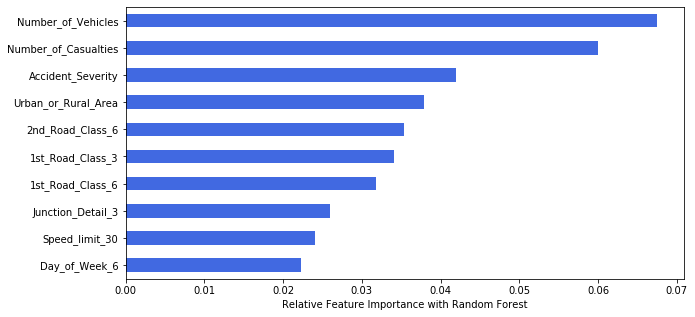

In [53]:
# plot the important features
feat_importances = pd.Series(forest_2.feature_importances_, index=features)
feat_importances.nlargest(10).sort_values().plot(kind='barh', color='royalblue', figsize=(10,5))
plt.xlabel('Relative Feature Importance with Random Forest');
plt.savefig('./images/police_attendance_predictors.png', bbox_inches='tight')